In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('wine quality.csv')

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


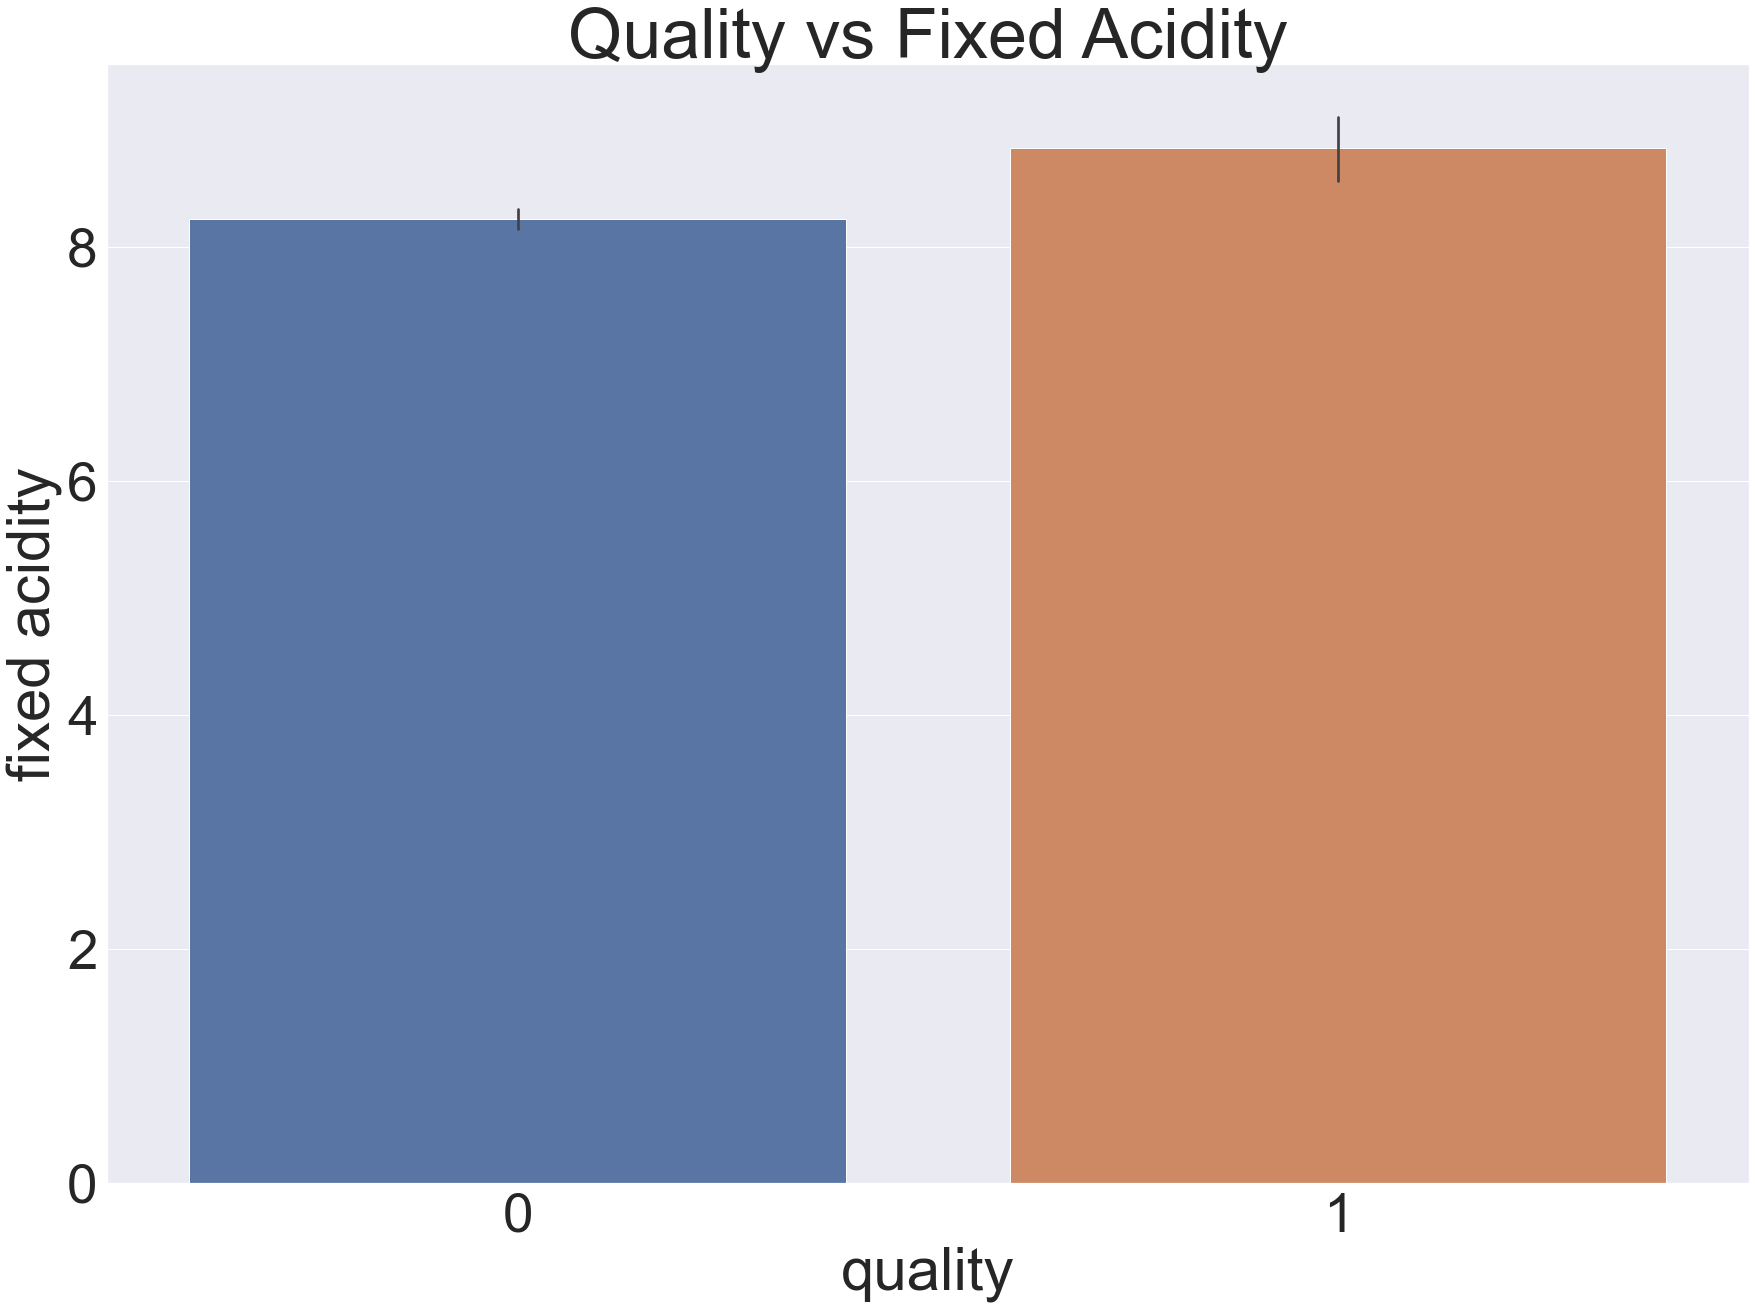

In [40]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title('Quality vs Fixed Acidity', fontsize=70)
sns.barplot(x='quality',y='fixed acidity', data=df)

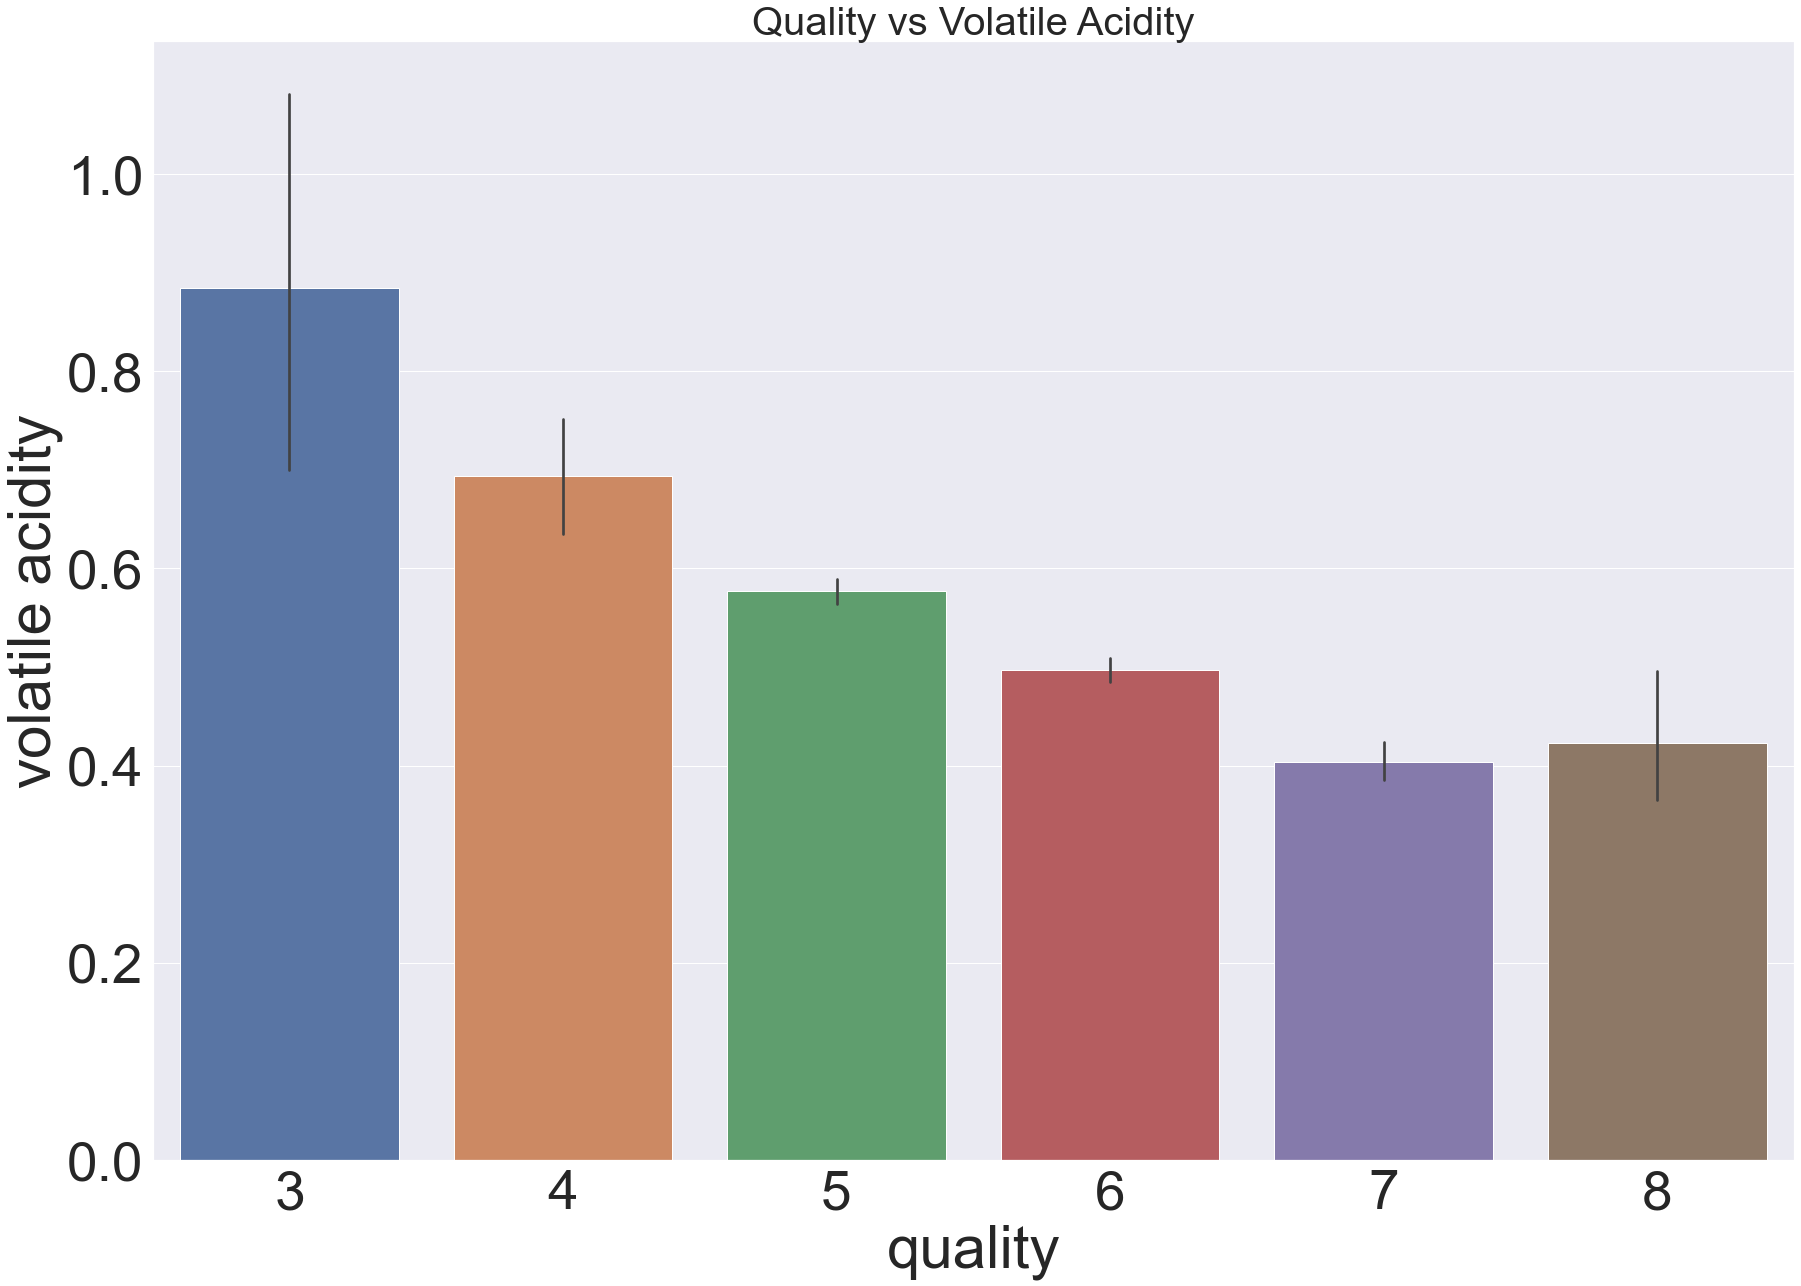

In [13]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(332)
plt.title('Quality vs Volatile Acidity', fontsize=40)
sns.barplot(x='quality', y='volatile acidity', data=df)

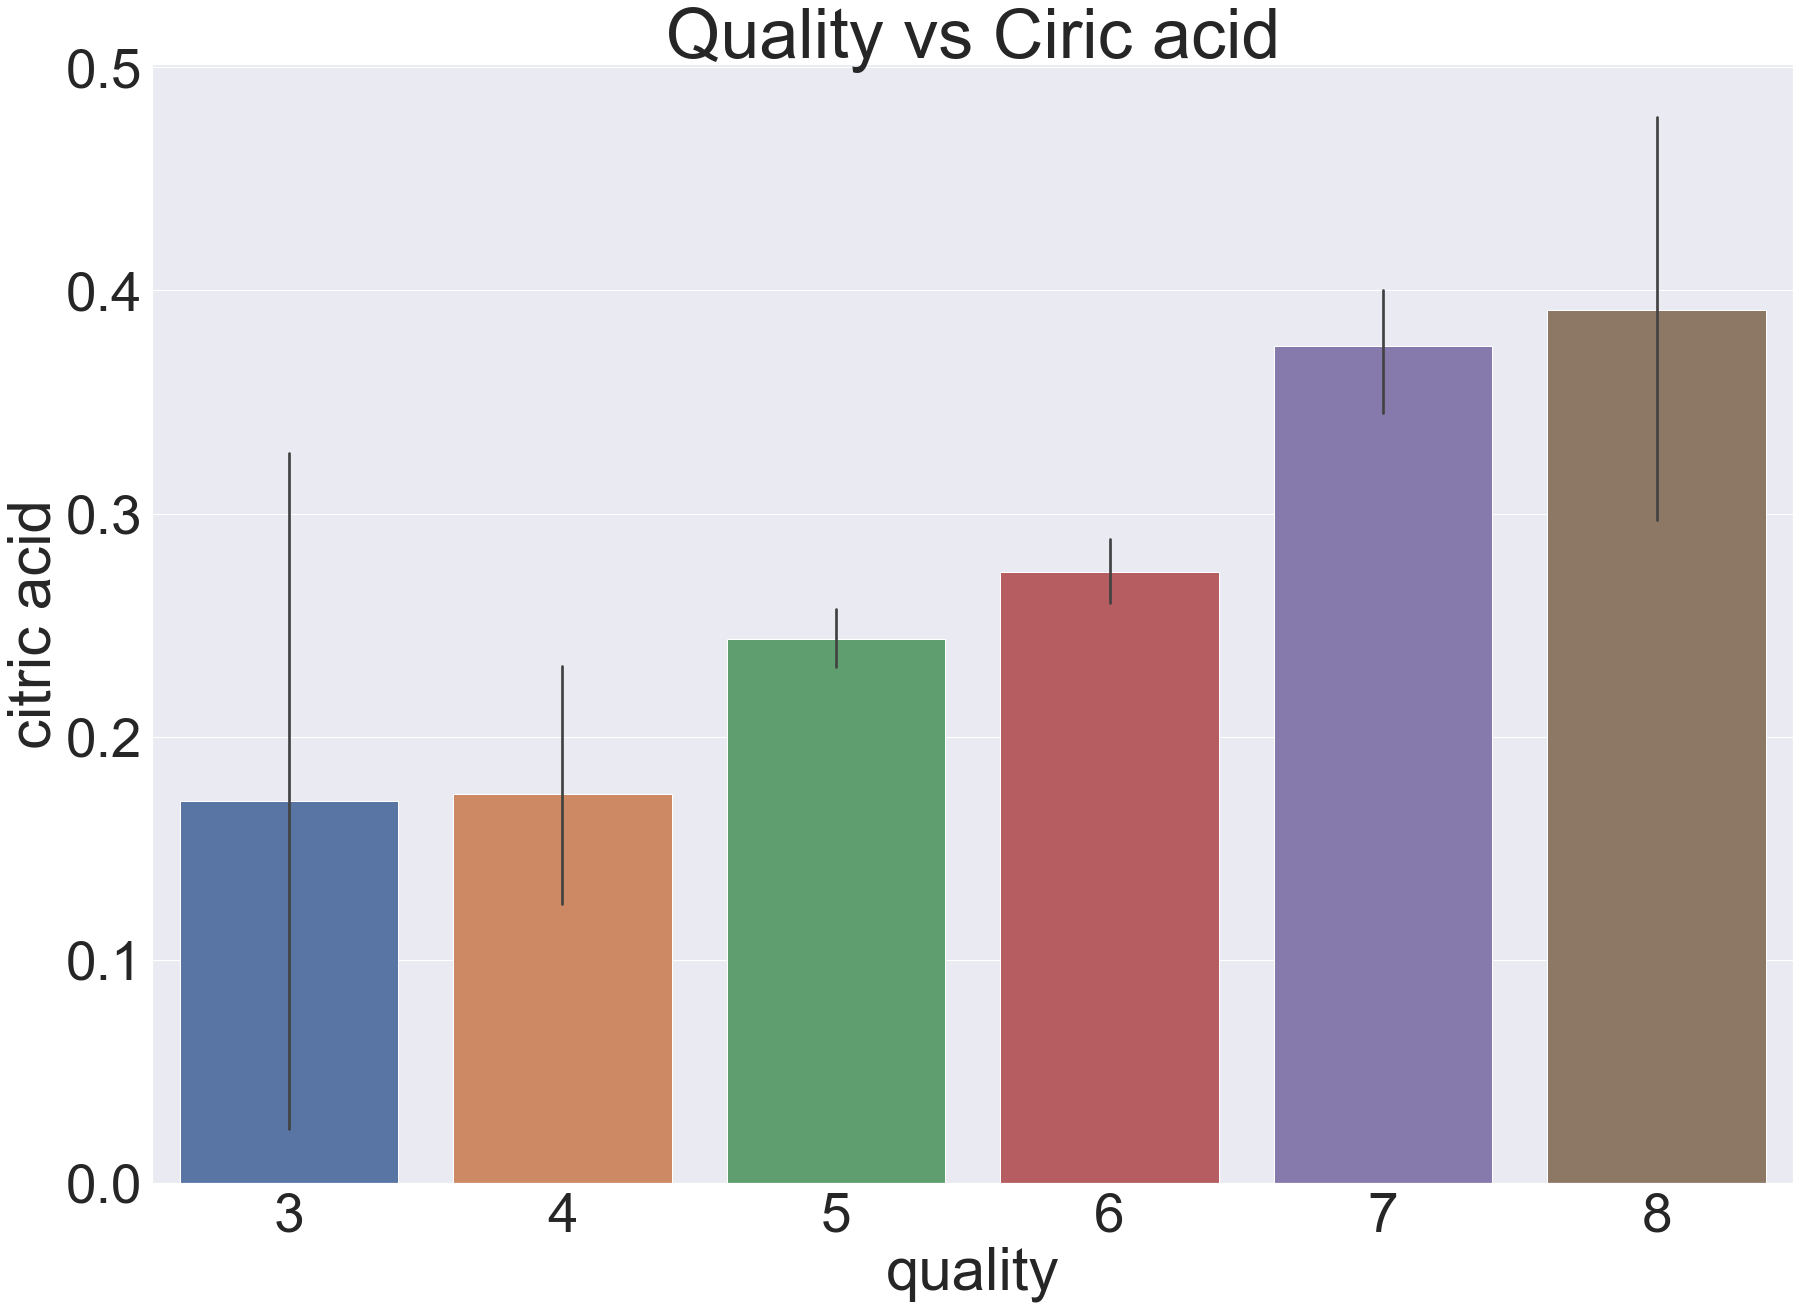

In [14]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(333)
plt.title('Quality vs Ciric acid', fontsize=70)
sns.barplot(x='quality', y='citric acid', data=df)

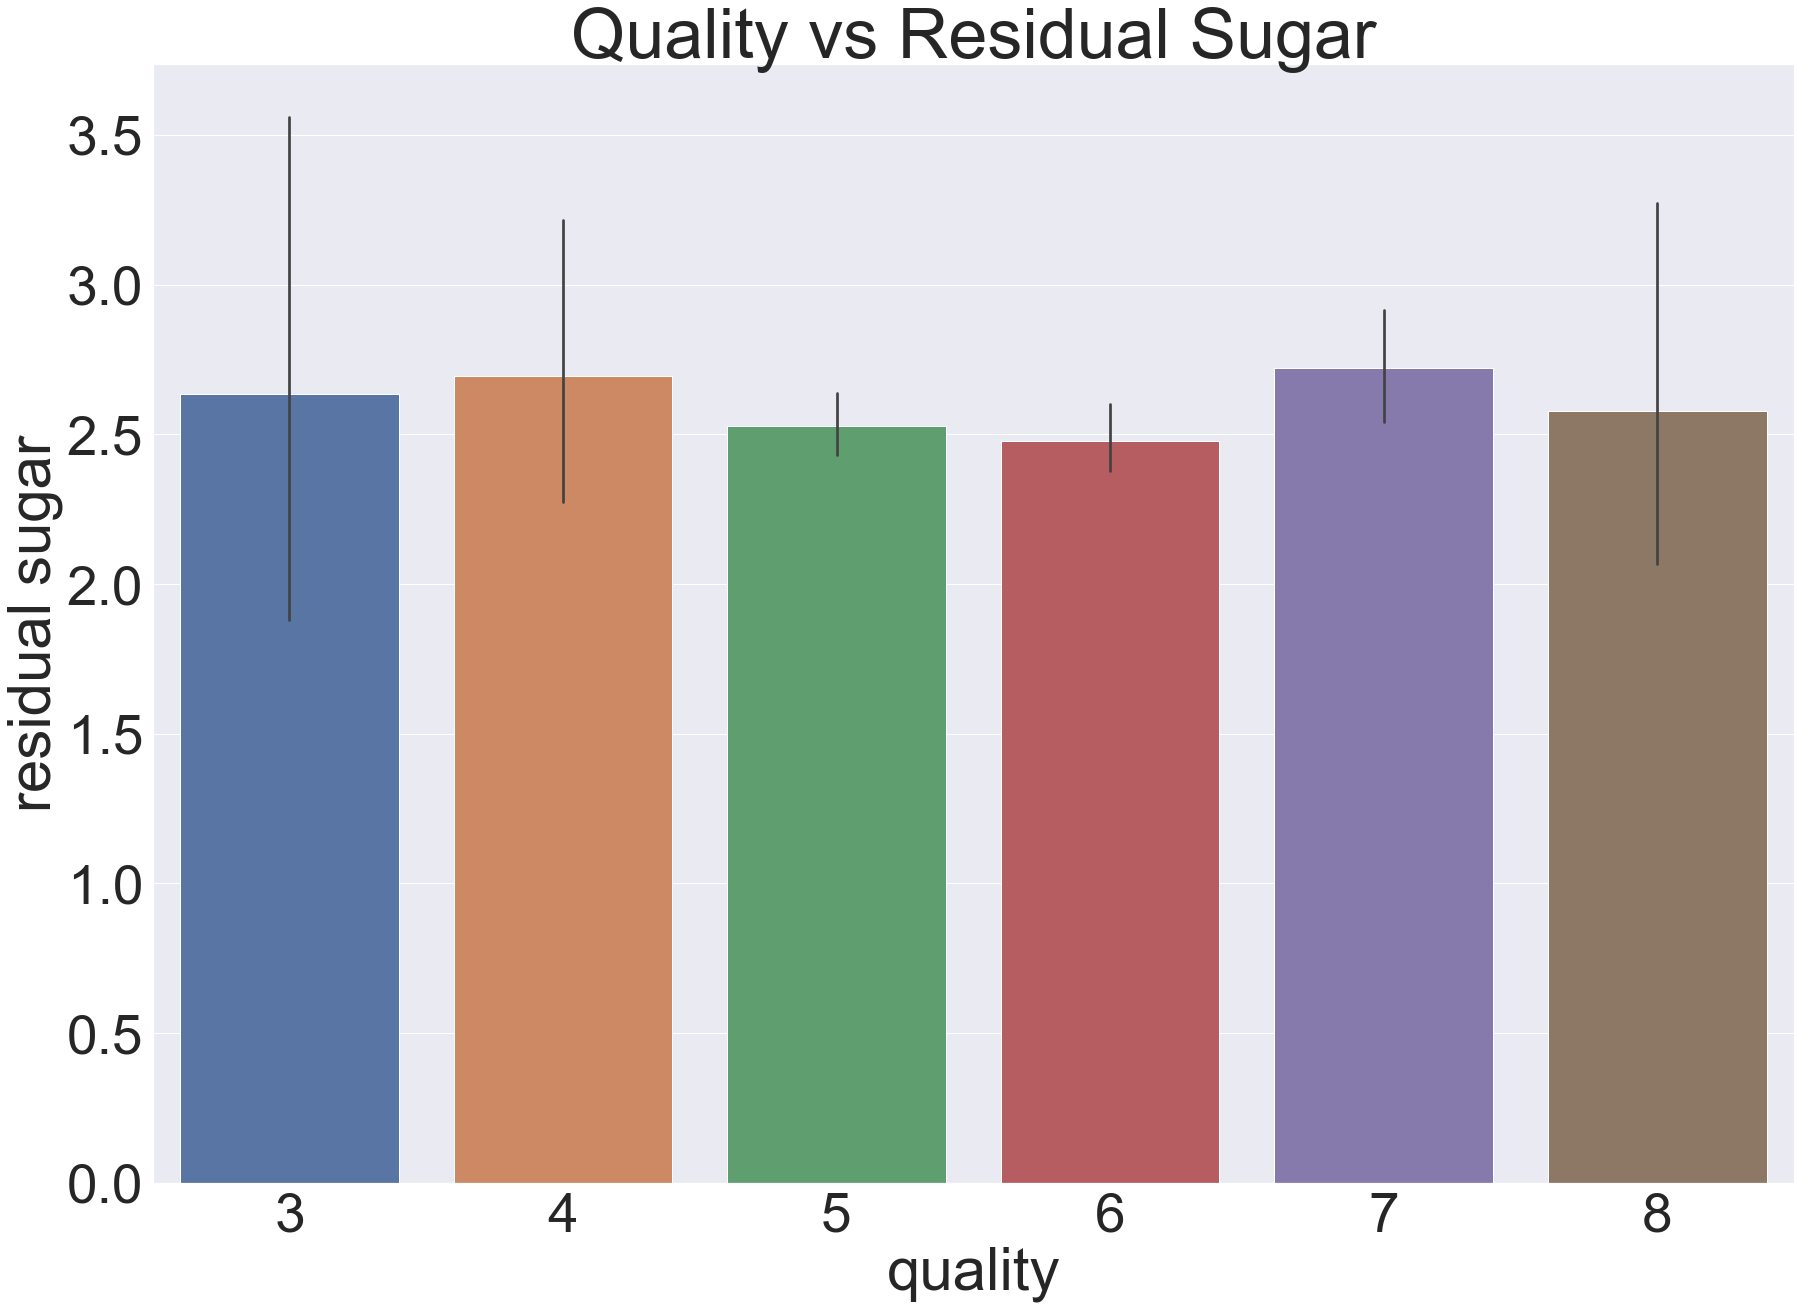

In [15]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(334)
plt.title('Quality vs Residual Sugar', fontsize=70)
sns.barplot(x='quality', y='residual sugar', data=df)

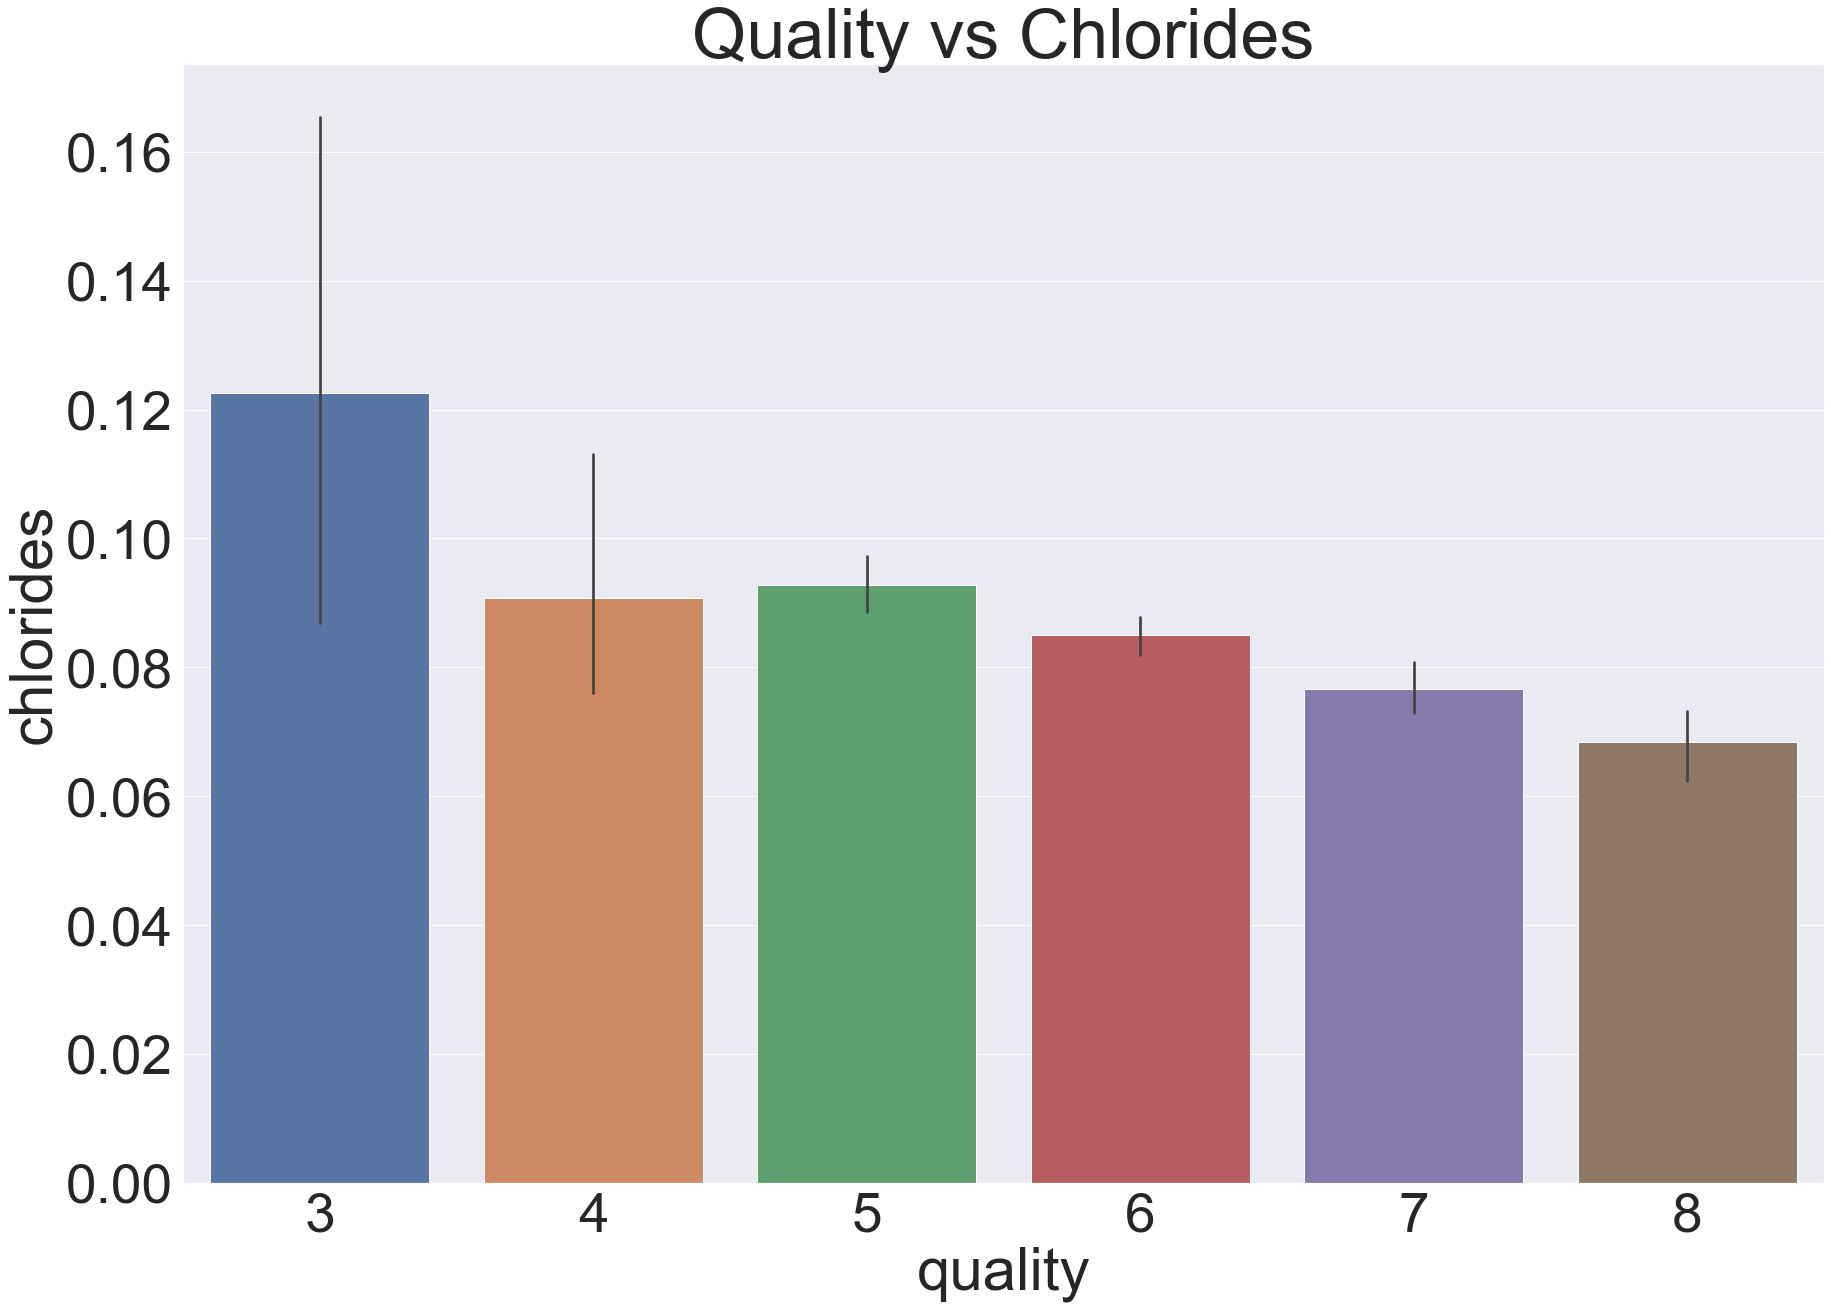

In [16]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(335)
plt.title('Quality vs Chlorides', fontsize=70)
sns.barplot(x='quality', y='chlorides', data=df)

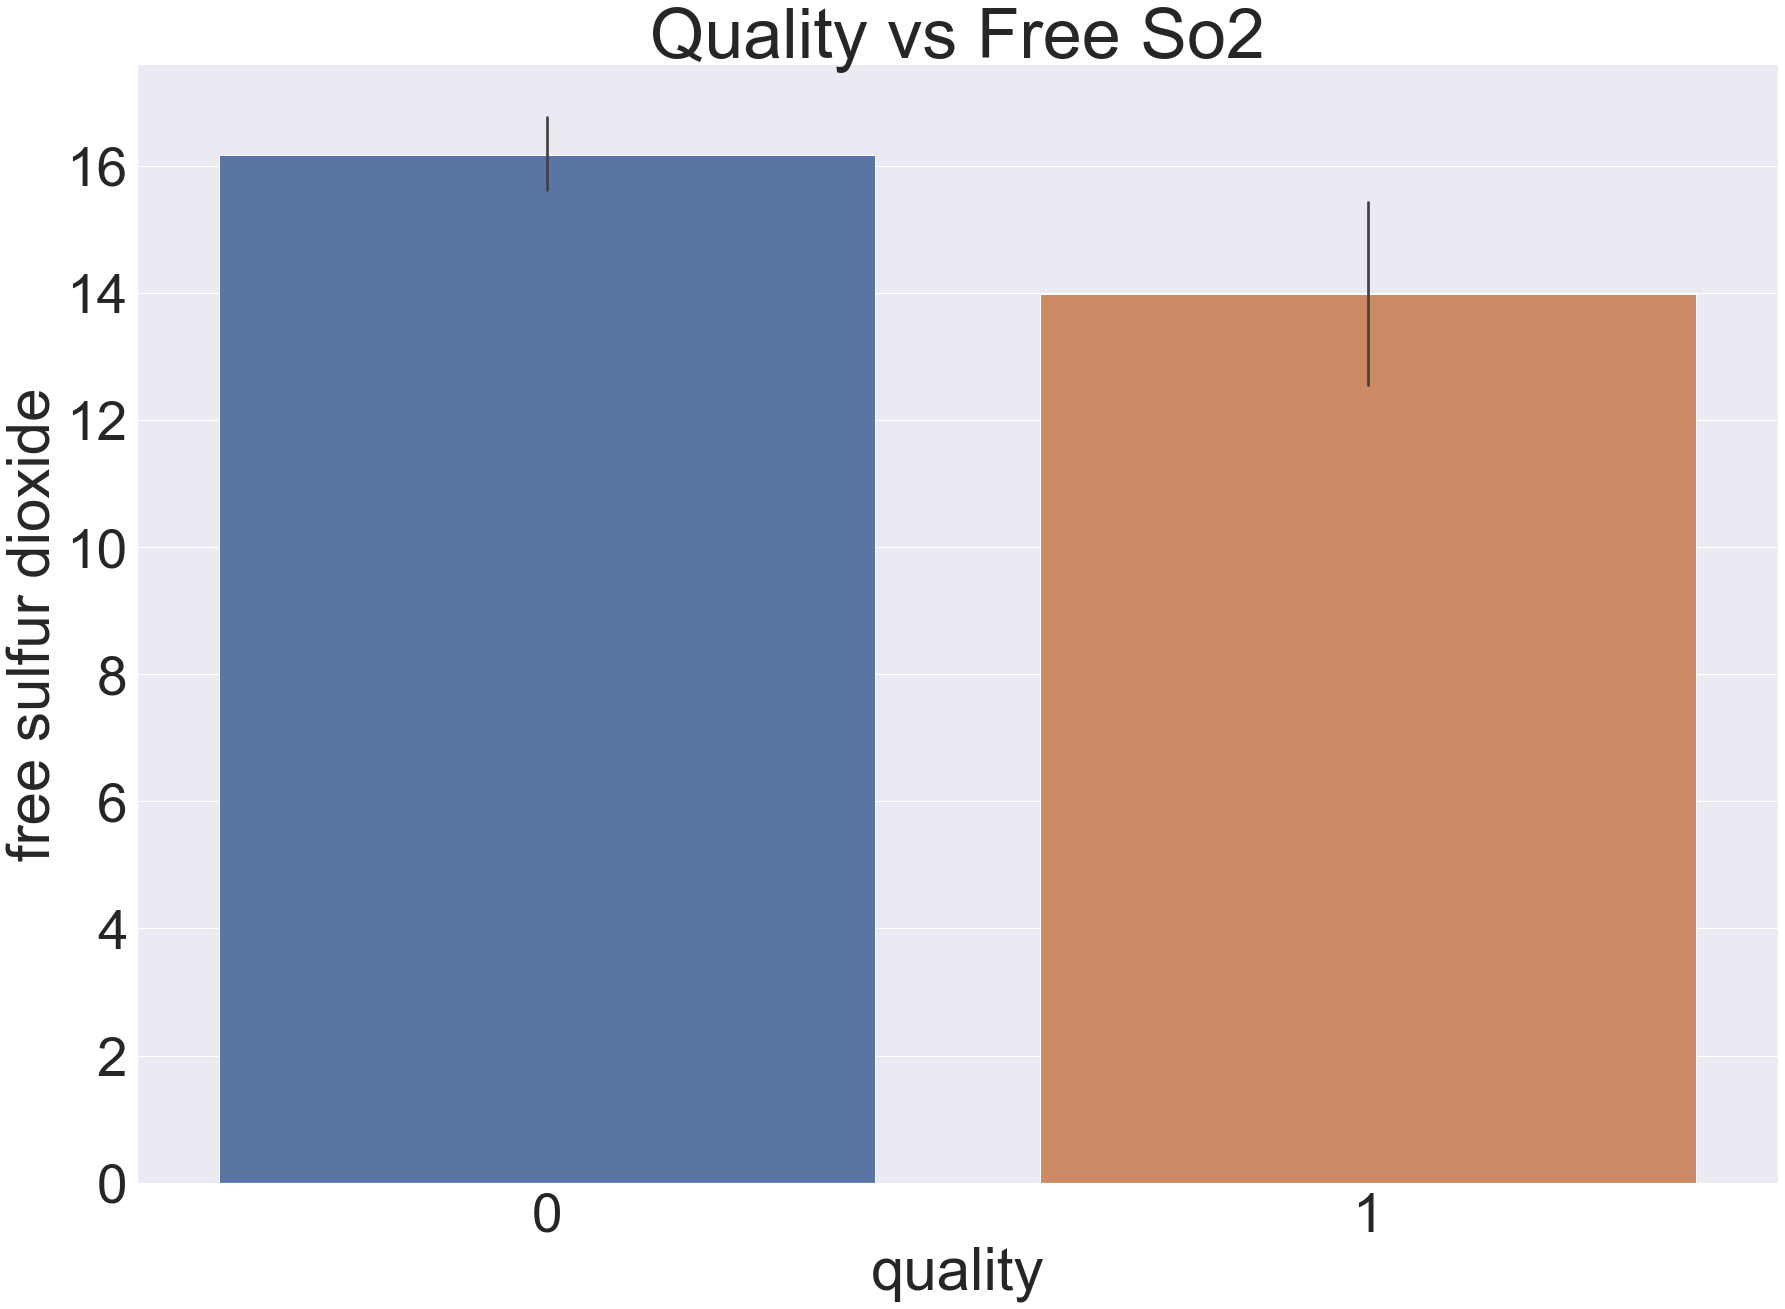

In [43]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(338)
plt.title('Quality vs Free So2', fontsize=70)
sns.barplot(x='quality', y='free sulfur dioxide', data=df)

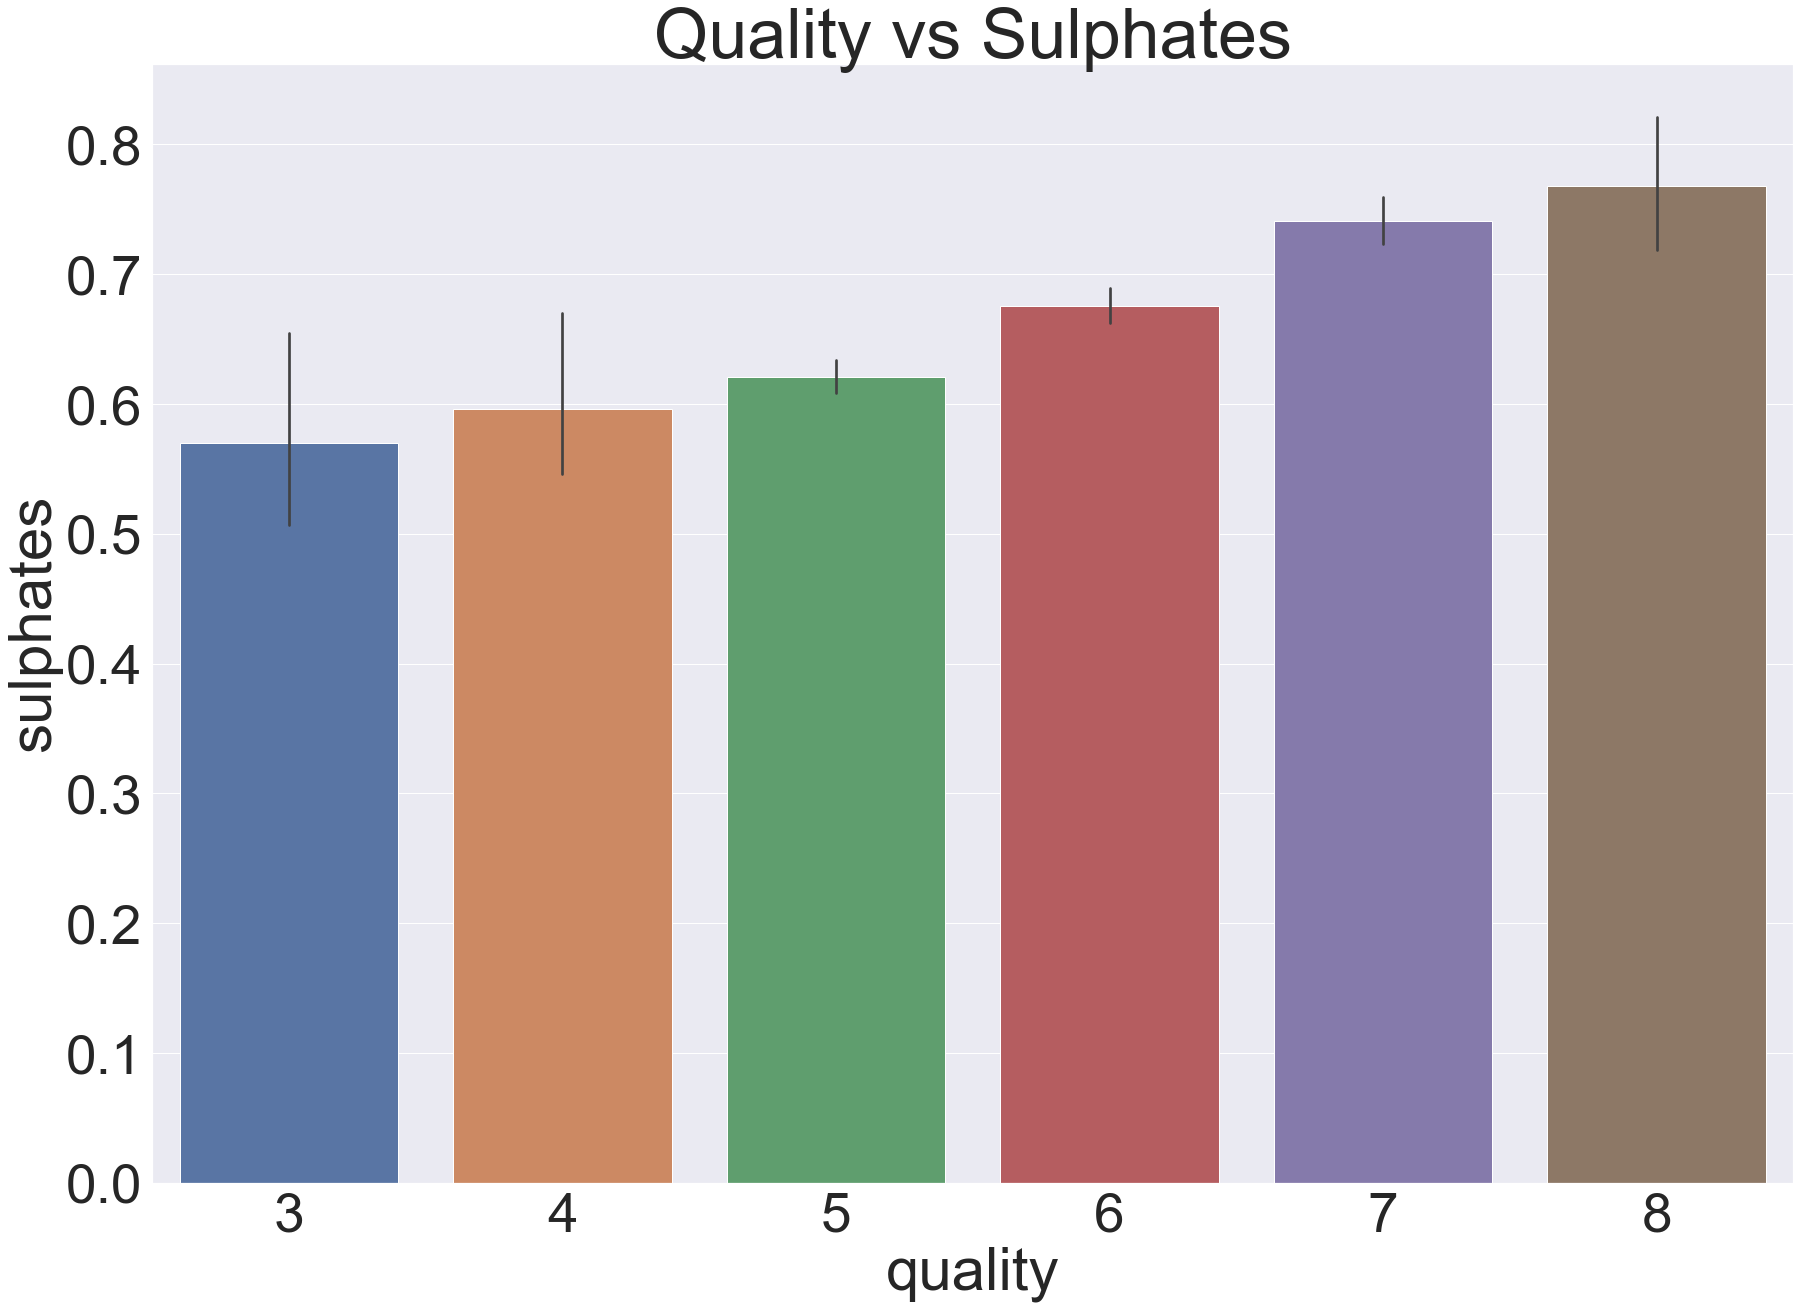

In [18]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(337)
plt.title('Quality vs Sulphates', fontsize=70)
sns.barplot(x='quality', y='sulphates', data=df)

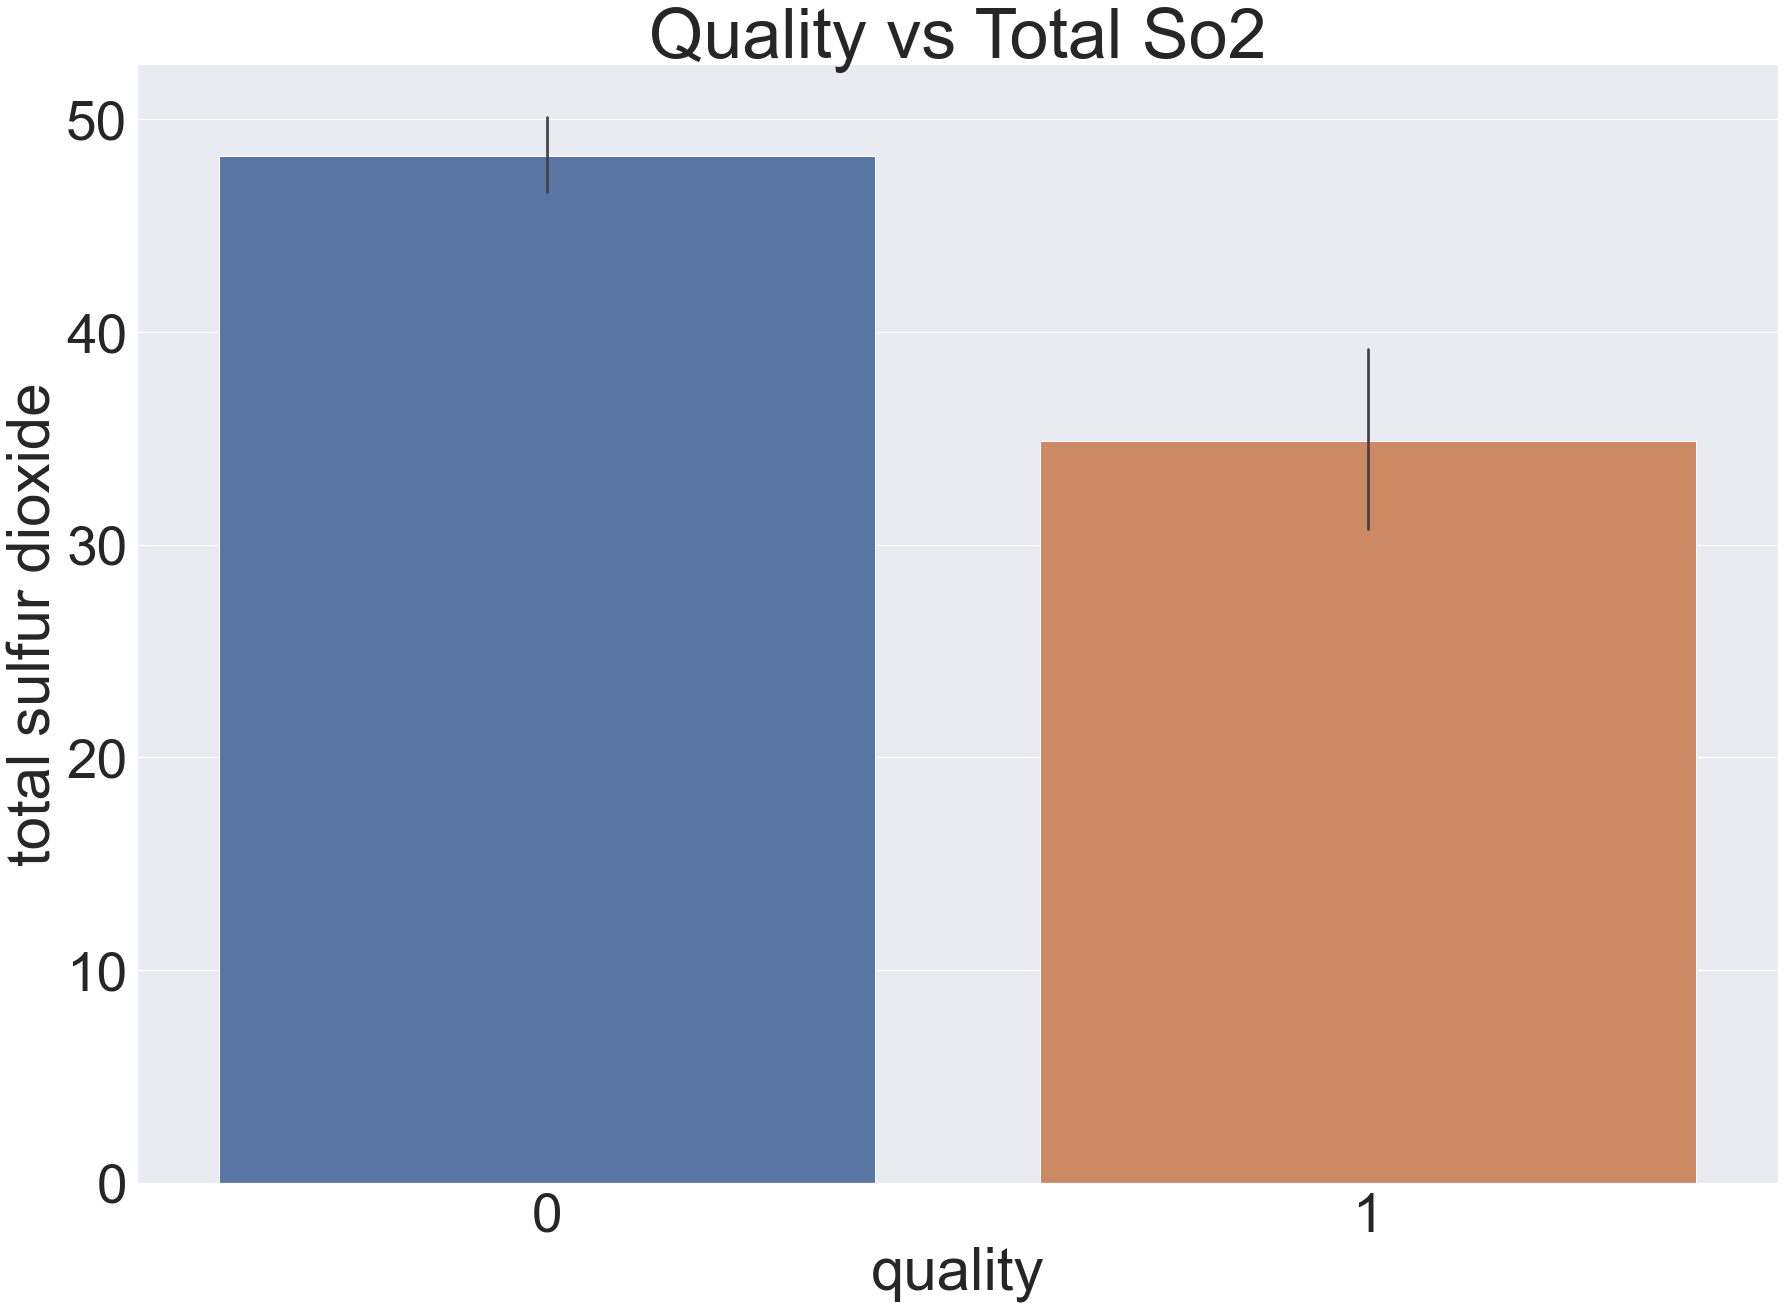

In [45]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(339)
plt.title('Quality vs Total So2', fontsize=70)
sns.barplot(x='quality', y='total sulfur dioxide', data=df)

In [20]:
bins=(2,6.5,8)
classes= ['bad','good']
df['quality']=pd.cut(df['quality'],bins=bins,labels=classes)

In [21]:
label_quality=LabelEncoder()

In [22]:
df['quality']= label_quality.fit_transform(df['quality'])

In [23]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [24]:
# 0 indicates bad and 1 indicates good

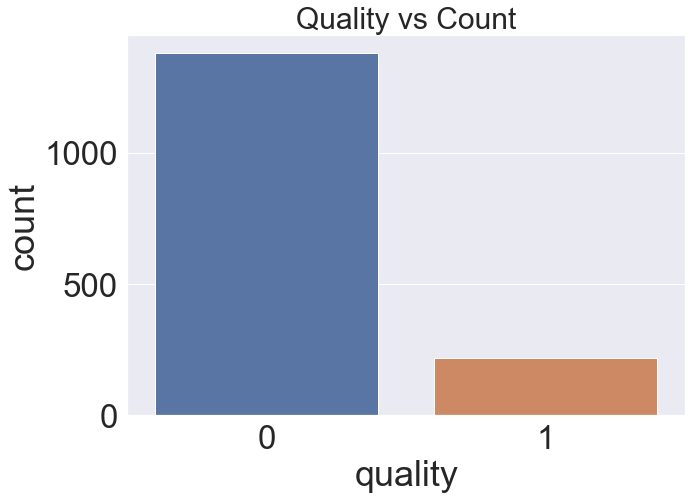

In [25]:
plt.figure(figsize=(10,7))
sns.set(font_scale=3)
plt.title('Quality vs Count',fontsize=30)
sns.countplot(df['quality'])

In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [27]:
x=df.drop('quality',axis=1)
y=df['quality']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [29]:
sc=StandardScaler()

In [30]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Random Forest Classifier

In [31]:
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train,y_train)
pred_RF=RF.predict(x_test)

In [32]:
pred1=accuracy_score(y_test,pred_RF)
print(pred1)

0.89375


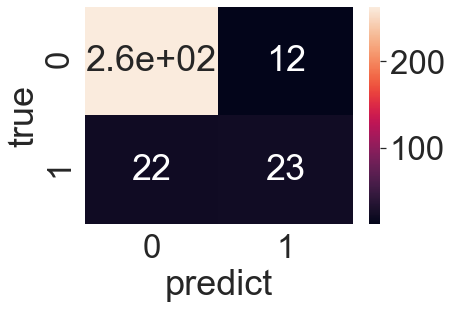

In [33]:
cm1=confusion_matrix(y_test,pred_RF)
ax1=sns.heatmap(cm1,annot=True)
ax1.set(xlabel='predict',ylabel='true')
plt.show()

# Logistic Regression

In [34]:
LR= LogisticRegression().fit(x_train,y_train)

0.8875


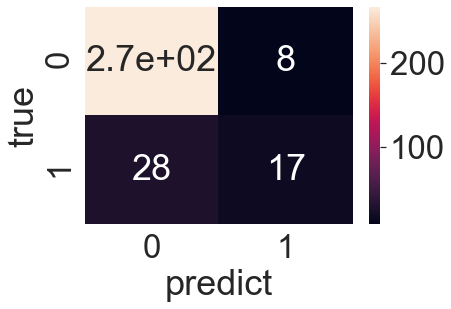

In [35]:
pred_LR=LR.predict(x_test)
cm2=confusion_matrix(y_test,pred_LR)
ax2=sns.heatmap(cm2,annot=True)
ax2.set(xlabel='predict',ylabel='true')
pred2=accuracy_score(y_test,pred_LR)
print(pred2)